In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
vg_df = pd.read_csv('C:\\Youssef STD\\6th Term\\Data Analytics & optimization\\Project Section\\Video+Game+Sales\\vgchartz-2024.csv')
vg_df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,17/09/2013,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,18/11/2014,03/01/2018
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,28/10/2002,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,17/09/2013,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,06/11/2015,14/01/2018


In [ ]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [ ]:
vg_df.drop_duplicates(inplace=True)

vg_df['release_date'] = pd.to_datetime(vg_df['release_date'], errors='coerce', dayfirst=True)
vg_df['last_update'] = pd.to_datetime(vg_df['last_update'], errors='coerce', dayfirst=True)

for col in ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']:
    vg_df[col] = pd.to_numeric(vg_df[col], errors='coerce')  

vg_df.dropna(subset=['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales'], how='all', inplace=True)
vg_df.info()
vg_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 18922 entries, 0 to 18921
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           18922 non-null  object        
 1   title         18922 non-null  object        
 2   console       18922 non-null  object        
 3   genre         18922 non-null  object        
 4   publisher     18922 non-null  object        
 5   developer     18918 non-null  object        
 6   critic_score  4126 non-null   float64       
 7   total_sales   18922 non-null  float64       
 8   na_sales      12637 non-null  float64       
 9   jp_sales      6726 non-null   float64       
 10  pal_sales     12824 non-null  float64       
 11  other_sales   15128 non-null  float64       
 12  release_date  18832 non-null  datetime64[ns]
 13  last_update   4019 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(6)
memory usage: 2.2+ MB


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaT
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaT
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaT
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


<class 'pandas.core.frame.DataFrame'>
Index: 4126 entries, 0 to 18919
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           4126 non-null   object        
 1   title         4126 non-null   object        
 2   console       4126 non-null   object        
 3   genre         4126 non-null   object        
 4   publisher     4126 non-null   object        
 5   developer     4126 non-null   object        
 6   critic_score  4126 non-null   float64       
 7   total_sales   4126 non-null   float64       
 8   na_sales      3738 non-null   float64       
 9   jp_sales      1402 non-null   float64       
 10  pal_sales     3779 non-null   float64       
 11  other_sales   4003 non-null   float64       
 12  release_date  4123 non-null   datetime64[ns]
 13  last_update   602 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(6)
memory usage: 483.5+ KB

 SUMMARY STATISTICS:


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,4126.000000,4126.000000,3738.000000,1402.000000,3779.000000,4003.000000,4123,602
mean,7.101890,0.737230,0.416581,0.108959,0.263697,0.083560,2007-11-18 12:33:21.261217280,2018-06-26 18:34:41.063122944
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989-06-01 00:00:00,2017-12-23 00:00:00
25%,6.300000,0.110000,0.080000,0.020000,0.020000,0.010000,2004-10-26 00:00:00,2018-03-01 00:00:00
50%,7.300000,0.300000,0.180000,0.050000,0.070000,0.020000,2008-03-25 00:00:00,2018-04-03 00:00:00
75%,8.100000,0.750000,0.430000,0.130000,0.250000,0.080000,2010-10-19 00:00:00,2018-09-17 18:00:00
max,10.000000,20.320000,9.760000,1.870000,9.850000,3.120000,2020-12-31 00:00:00,2022-07-10 00:00:00
std,1.439307,1.408497,0.734706,0.162062,0.612218,0.199425,nan,nan



 Top 10 Publishers:


,Game Count
publisher,
Electronic Arts,338
Activision,318
Ubisoft,301
THQ,198
EA Sports,194
Sega,183
Sony Computer Entertainment,169
Nintendo,169
Konami,158



 Top 10 Consoles:


,Game Count
console,
X360,592
PS3,471
PSP,383
PC,370
GBA,304
PS2,299
GC,289
Wii,282
DS,244


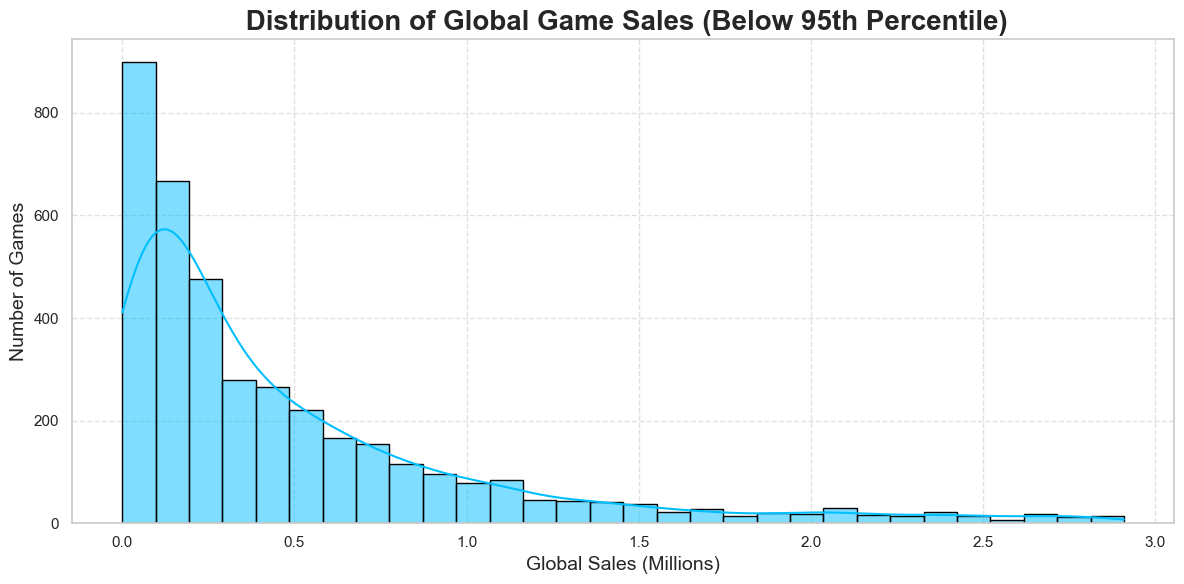

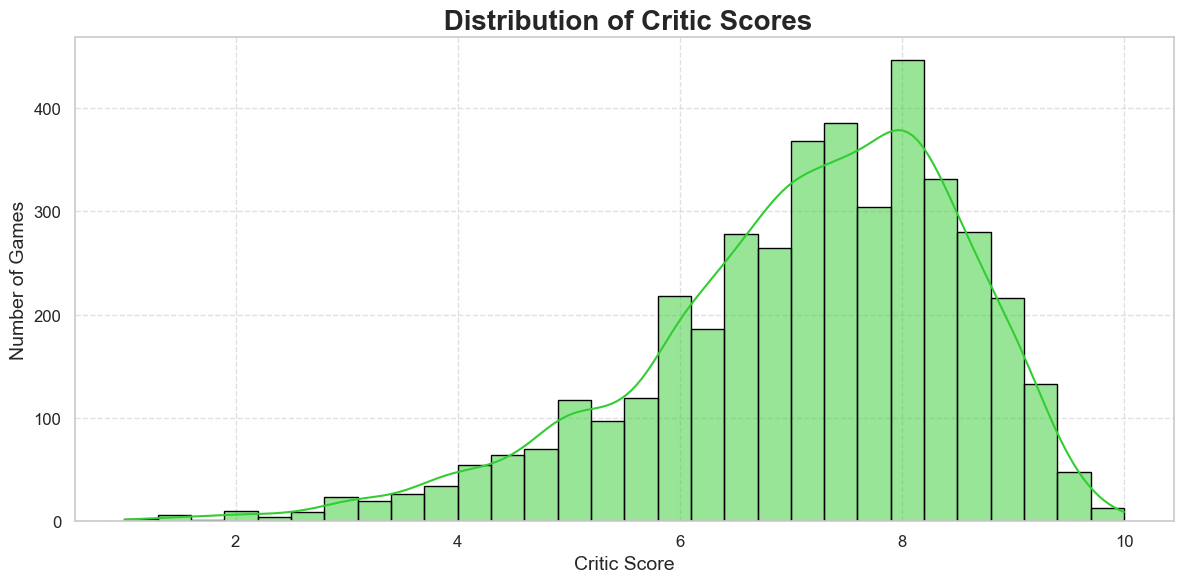

In [ ]:

vg_df['release_date'] = pd.to_datetime(vg_df['release_date'], errors='coerce')
vg_df = vg_df.dropna(subset=['total_sales', 'critic_score'])


vg_df.info()

print("\n SUMMARY STATISTICS:")
display(vg_df.describe().style.background_gradient(cmap='Blues'))

# Top 10 Publishers & Consoles

top_publishers = vg_df['publisher'].value_counts().head(10)
print("\n Top 10 Publishers:")
display(top_publishers.to_frame(name='Game Count').style.bar(color='Dark blue'))

# Top Consoles
top_consoles = vg_df['console'].value_counts().head(10)
print("\n Top 10 Consoles:")
display(top_consoles.to_frame(name='Game Count').style.bar(color='Darkgreen'))

# Histograms:

# threshold to exclude top 5% of sales
threshold = vg_df['total_sales'].quantile(0.95)

filtered_df = vg_df[vg_df['total_sales'] <= threshold]

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='total_sales', bins=30, kde=True, color='#00BFFF', edgecolor='black')
plt.title(' Distribution of Global Game Sales (Below 95th Percentile)', fontsize=20, weight='bold')
plt.xlabel('Global Sales (Millions)', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=vg_df, x='critic_score', bins=30, kde=True, color='#32CD32', edgecolor='black')
plt.title(' Distribution of Critic Scores', fontsize=20, weight='bold')
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


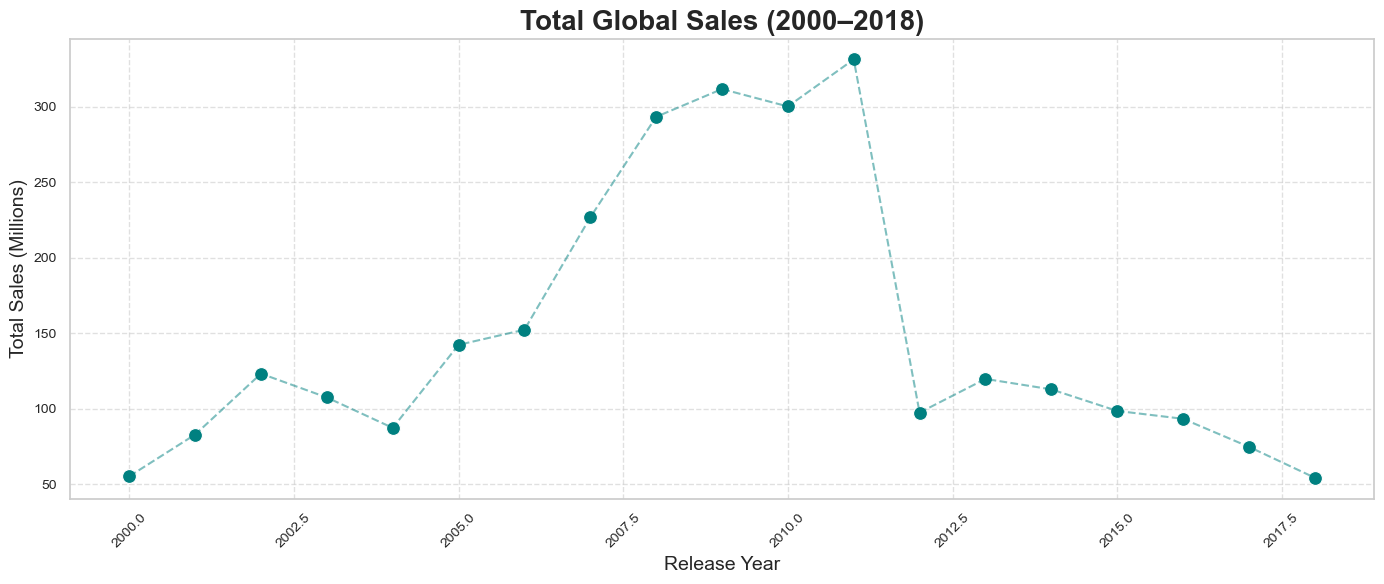

In [ ]:
vg_df['release_date'] = pd.to_datetime(vg_df['release_date'], errors='coerce')

# Extract year
vg_df['release_year'] = vg_df['release_date'].dt.year

# Group by year
yearly_summary = vg_df.groupby('release_year').agg(
    total_games=('title', 'count'),
    valid_sales=('total_sales', lambda x: x.notna().sum()),
    total_sales_sum=('total_sales', 'sum')
).reset_index()

# Filter between 2000 and 2018
filtered_sales = yearly_summary[
    (yearly_summary['release_year'] >= 2000) &
    (yearly_summary['release_year'] <= 2018) &
    (yearly_summary['valid_sales'] > 0)
]

plt.figure(figsize=(14, 6))
sns.scatterplot(
    x=filtered_sales['release_year'],
    y=filtered_sales['total_sales_sum'],
    s=100,
    color='teal',
    marker='o'
)
plt.plot(filtered_sales['release_year'], filtered_sales['total_sales_sum'],
         color='teal', alpha=0.5, linestyle='--')

plt.title('Total Global Sales (2000–2018)', fontsize=20, weight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Sales (Millions)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\yalla\AppData\Local\Temp\ipykernel_23680\3971582578.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




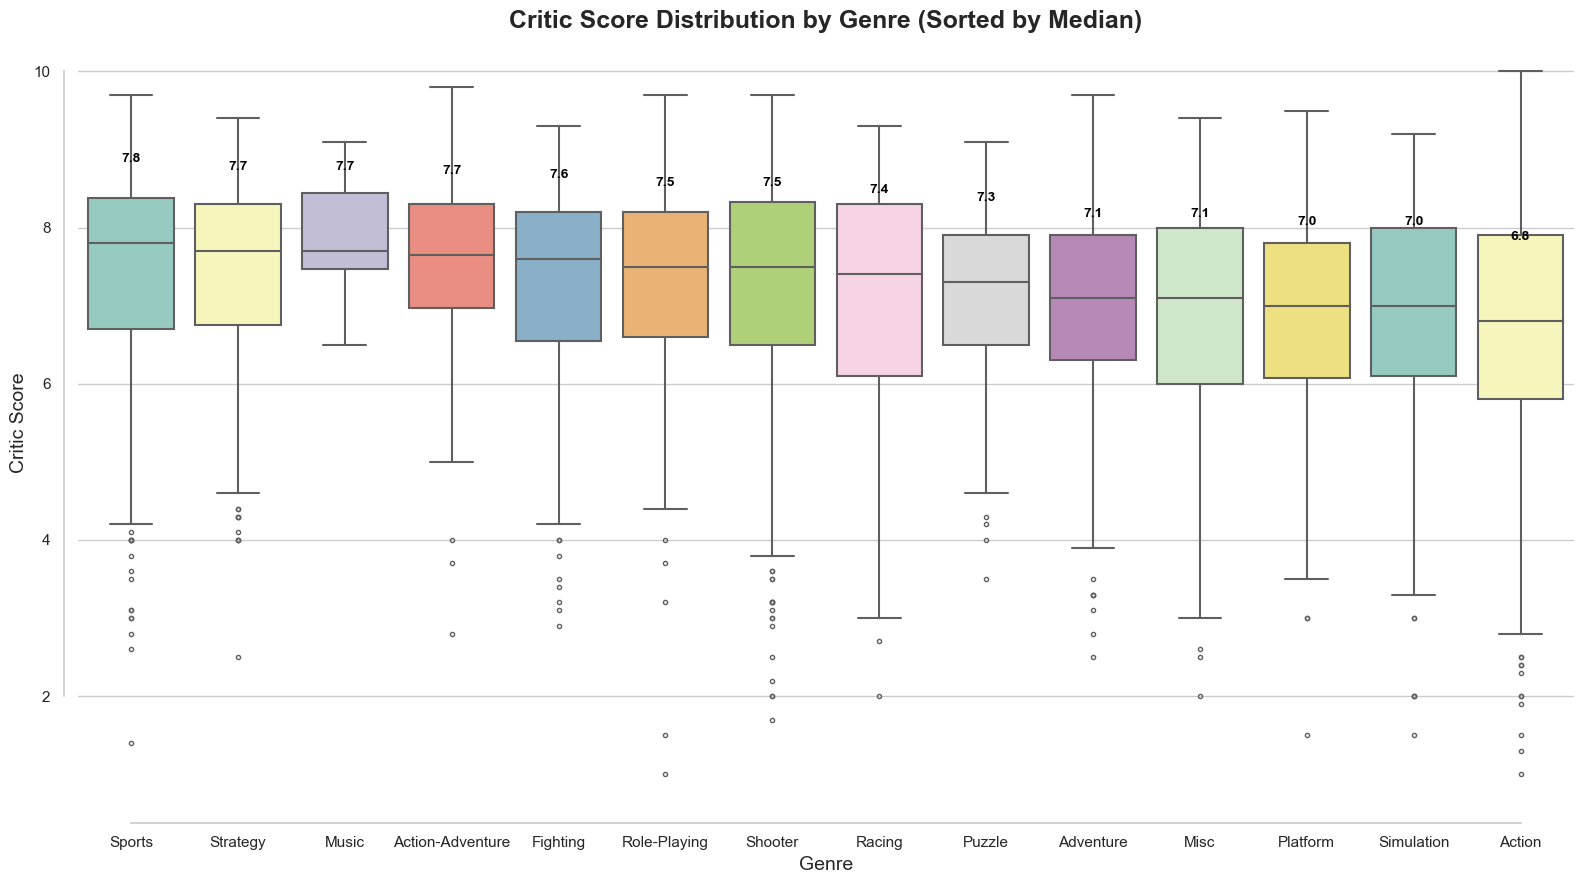

In [ ]:
clean_df = vg_df.dropna(subset=['genre', 'critic_score'])
clean_df = clean_df[(clean_df['critic_score'] >= 0) & (clean_df['critic_score'] <= 100)]

genre_counts = clean_df['genre'].value_counts()
filtered_genres = genre_counts[genre_counts >= 10].index
filtered_df = clean_df[clean_df['genre'].isin(filtered_genres)].copy()

median_scores = (
    filtered_df.groupby('genre')['critic_score']
    .median()
    .sort_values(ascending=False)
)
filtered_df['genre'] = pd.Categorical(
    filtered_df['genre'],
    categories=median_scores.index,
    ordered=True
)

plt.figure(figsize=(16, 9))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(
    x='genre',
    y='critic_score',
    data=filtered_df,
    palette="Set3",
    linewidth=1.5,
    fliersize=3
)

for i, genre in enumerate(median_scores.index):
    median = median_scores[genre]
    ax.text(i, median + 1, f'{median:.1f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

ax.set_title('Critic Score Distribution by Genre (Sorted by Median)', fontsize=18, fontweight='bold')
ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Critic Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

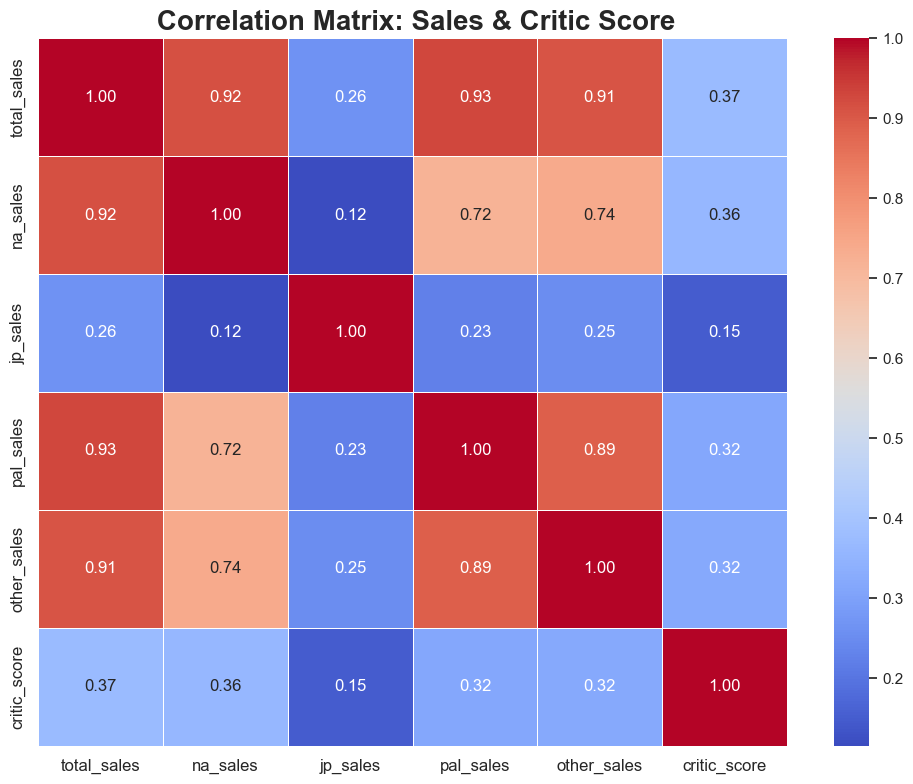

In [ ]:
corr_columns = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'critic_score']
corr_df = vg_df[corr_columns].apply(pd.to_numeric, errors='coerce').dropna()

corr = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title(' Correlation Matrix: Sales & Critic Score', fontsize=20, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


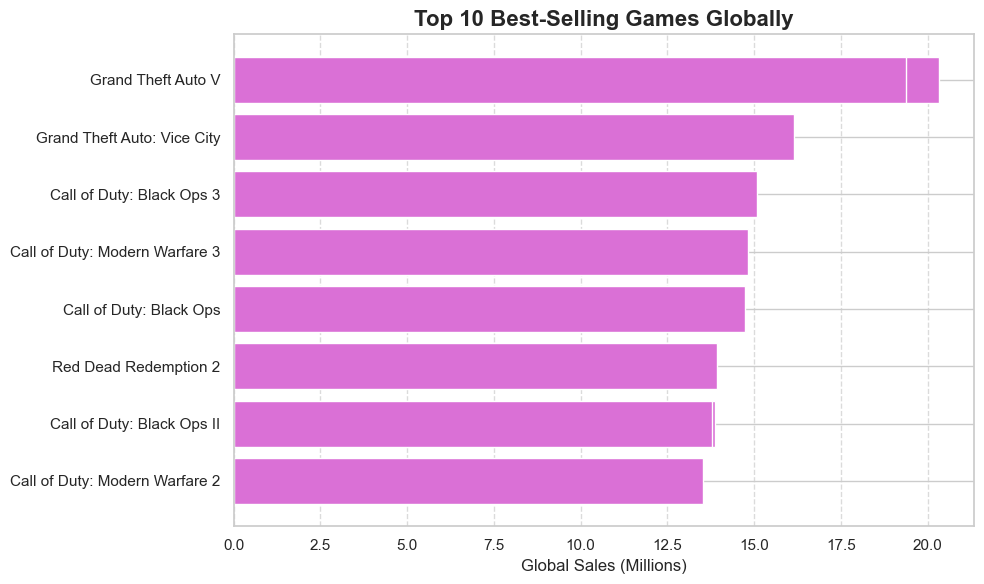

In [ ]:
vg_df = vg_df.dropna(subset=['title', 'total_sales'])

#top 10 games by total sales
top_games = vg_df.sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_games['title'], top_games['total_sales'], color='orchid')
plt.xlabel('Global Sales (Millions)', fontsize=12)
plt.title('Top 10 Best-Selling Games Globally', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest-selling at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

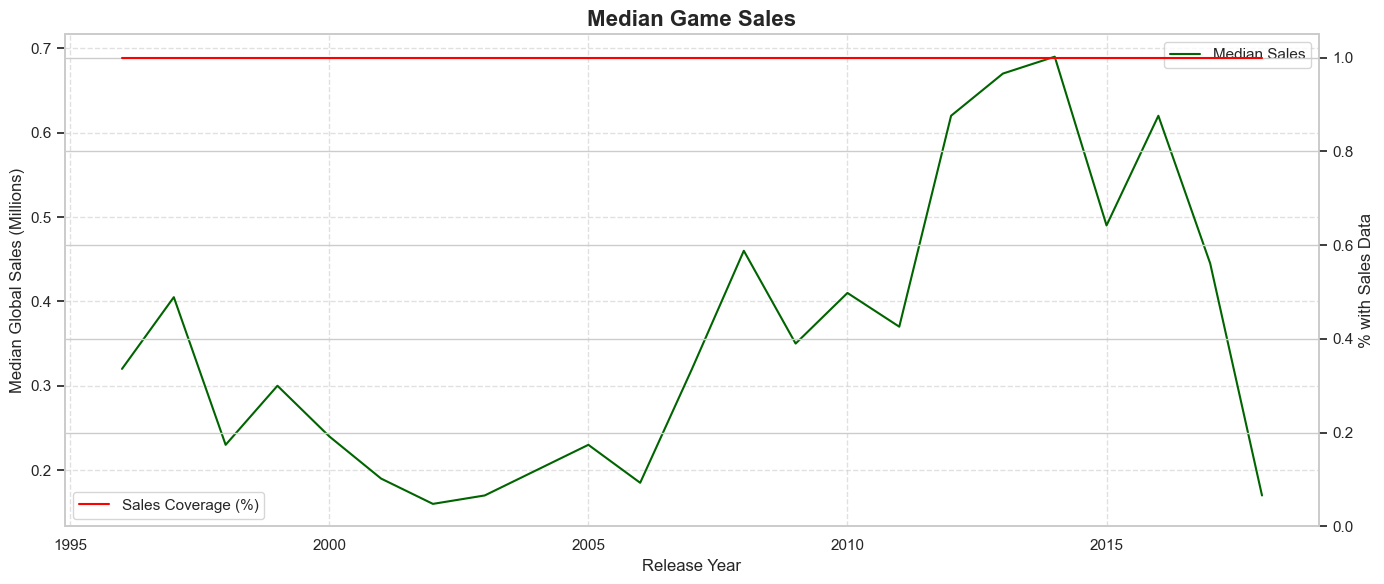

In [ ]:
yearly_stats = vg_df.groupby('release_year').agg(
    median_sales=('total_sales', 'median'),
    game_count=('title', 'count'),
    with_sales=('total_sales', lambda x: x.notna().sum())
).reset_index()

yearly_stats['sales_coverage'] = yearly_stats['with_sales'] / yearly_stats['game_count']

yearly_stats = yearly_stats[yearly_stats['game_count'] >= 10]

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=yearly_stats, x='release_year', y='median_sales', ax=ax1,
             color='darkgreen', label='Median Sales')
ax1.set_ylabel('Median Global Sales (Millions)', fontsize=12)
ax1.set_xlabel('Release Year', fontsize=12)

ax2 = ax1.twinx()
sns.lineplot(data=yearly_stats, x='release_year', y='sales_coverage', ax=ax2,
             color='red', label='Sales Coverage (%)')
ax2.set_ylabel('% with Sales Data', fontsize=12)
ax2.set_ylim(0, 1.05)

plt.title('Median Game Sales', fontsize=16, weight='bold')
ax1.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()


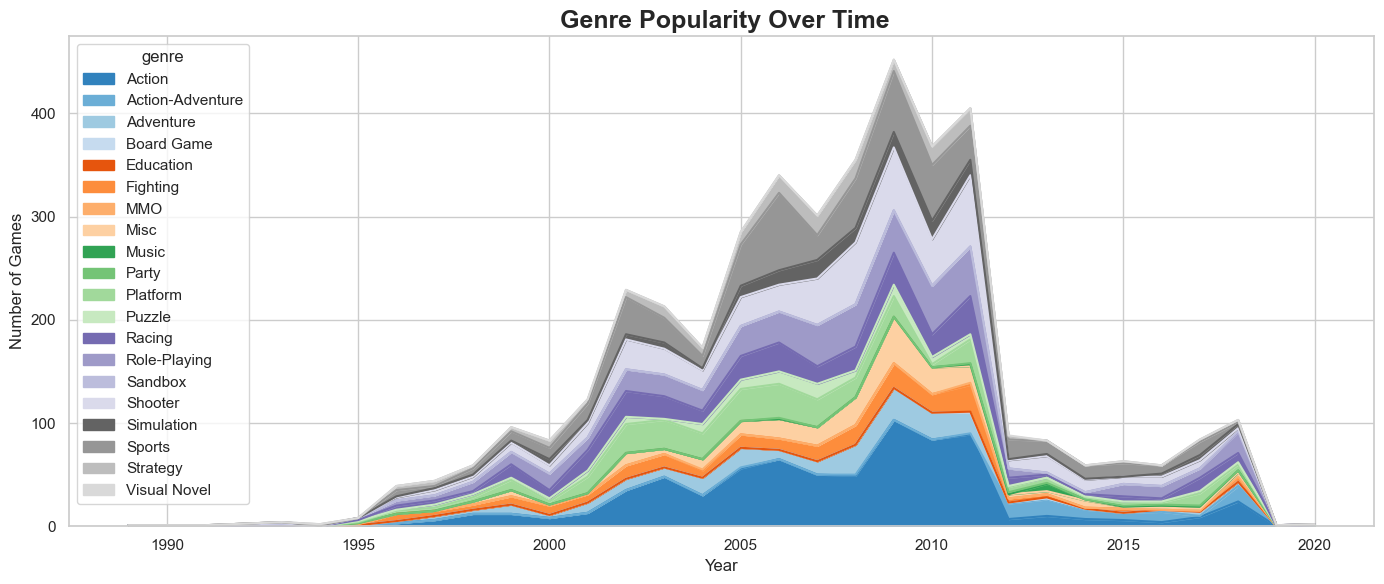

In [ ]:
genre_year = vg_df.groupby(['release_year', 'genre']).size().unstack().fillna(0)

genre_year.plot(kind='area', stacked=True, figsize=(14, 6), cmap='tab20c')
plt.title(' Genre Popularity Over Time', fontsize=18, weight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()


In [ ]:
fig = px.scatter_3d(
    clean_df,
    x='critic_score',
    y='total_sales',
    z='release_year',
    color='genre',
    hover_name='title',
    title='3D View: Critic Score, Sales & Release Year by Genre',
    template='plotly_dark',
    width=1000,    
    height=700    
)

fig.update_traces(marker=dict(size=5))
fig.show()
